# Dataset Preparation
The Breast Cancer Wisconsin Dataset is a popular dataset for binary classification problems, particularly used for predicting whether a tumor is benign or malignant based on various features derived from cell nuclei in images of fine needle aspirates (FNAs) of breast masses. The dataset has been widely used in machine learning research and practice, especially in the field of medical diagnosis.

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area. From this study, it was carried out to classify the detected tumors into malignant (cancerous) or benign (noncancerous).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It was found that the dataset used had a total of 32 columns. This shows that this dataset has 32 variables. The aim of creating a machine learning model using the Breast Cancer Wisconsin Dataset is to classify whether a tumor in the breast is a malignant or benign tumor based on various parameters measured from epithelial cells. Each column shows the difference between malignant and benign cancer cells based on their measurements.

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

It was found that there was an empty column in the Unnamed:32 column. Because the Unnamed:32 column does not contain important information as one of the determining parameters for classifying benign or malignant cancer, this column will be removed in the next section.

In [6]:
print("\nDiagnosis Distribution (malignant/benign):")
print(df['diagnosis'].value_counts())


Diagnosis Distribution (malignant/benign):
diagnosis
B    357
M    212
Name: count, dtype: int64


Based on the output above, it is known that the entire Wisconsin Breast Cancer Dataset that will be used for classification has 357 data with a benign diagnosis and 212 data with a malignant diagnosis.

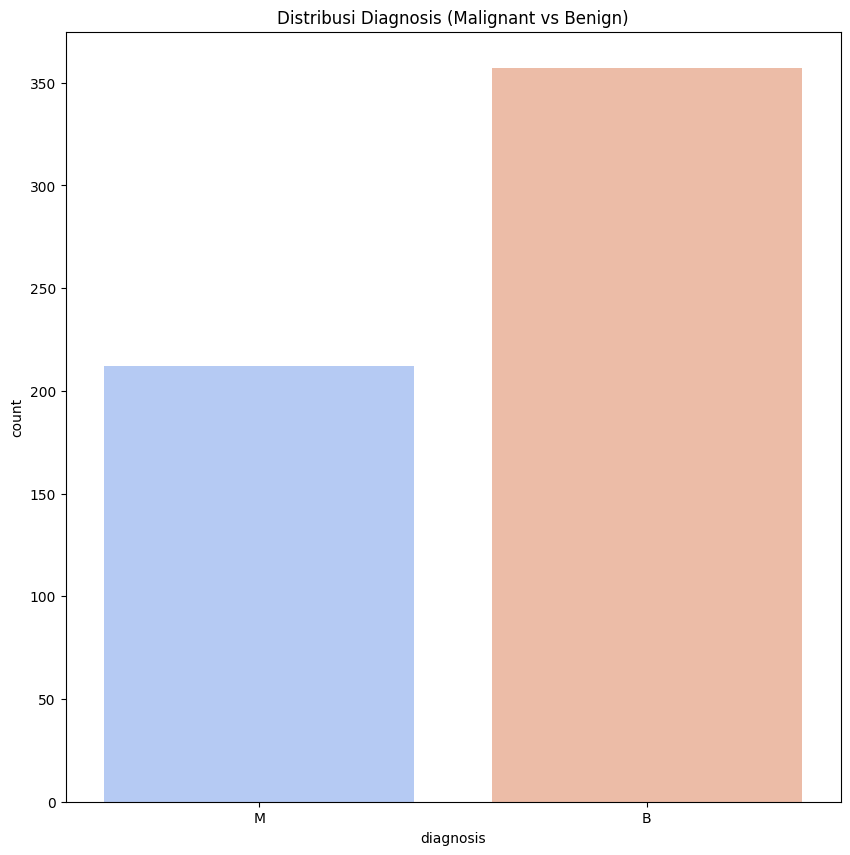

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title('Distribusi Diagnosis (Malignant vs Benign)')
plt.show()

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

Of all the 32 columns in the dataset at the beginning, we don't need the ID and Unnamed:32 columns because they did not have important information to determine whether the cancer cells were malignant or benign, so we decided to drop these two columns.

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To ensure that the ID and Unnamed:32 columns have been successfully dropped, the dataset you have is displayed. Found that the ID and Unnamed:32 columns no longer exist

In [11]:
X = df.drop('diagnosis', axis=1)  
y = df['diagnosis']

Because the aim is to determine whether the cancer cells are malignant or benign based on the measured parameters, the diagnosis column is moved to the y-axis as an influenced variable. The x-axis is confirmed for the measured parameters of cancer cells that affect the y-axis (malignant or benign diagnosis).

In [12]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

Encoding was carried out to facilitate analysis with the result "malignant(M)" coded as 1, while the result "benign(B)" was coded as 0.

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


It has been confirmed that the diagnosis column has been successfully encoded

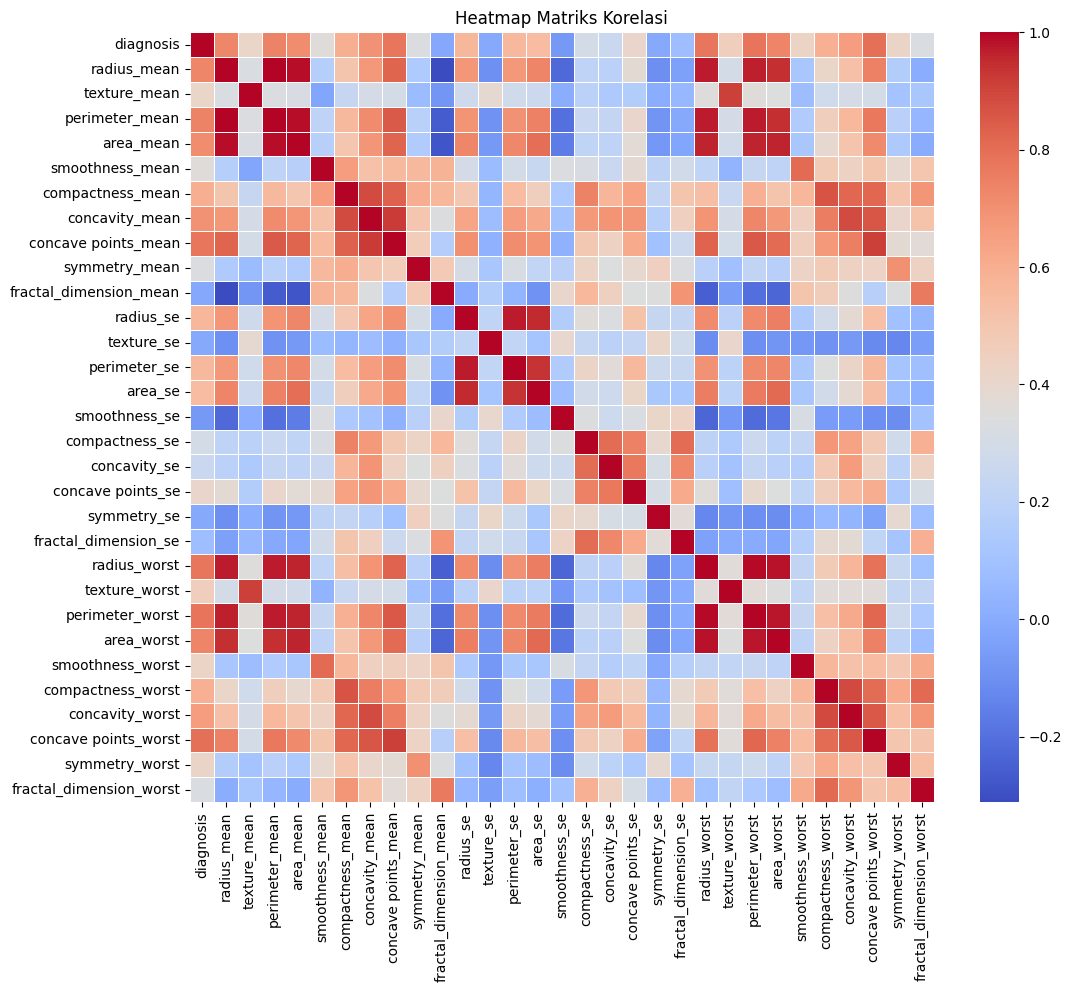

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matriks Korelasi')
plt.show()


The heat map above shows the correlation map of all variables.

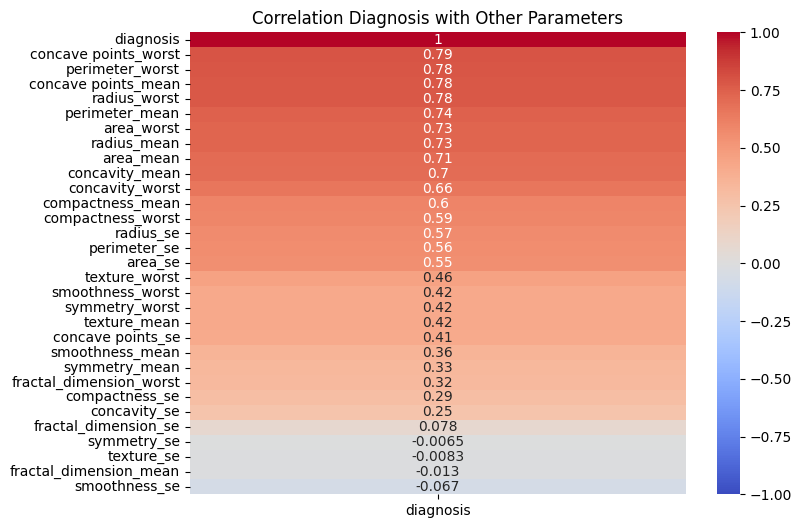

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Diagnosis with Other Parameters')
plt.show()

The image above is sorted from the strongest correlation to the weakest correlation with the diagnosis variable.

# Before PCA

Evaluation for model Random Forest:
Training set evaluation:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       286
           M       1.00      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Test set evaluation:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix for the test set:
[[70  1]
 [ 3 40]]


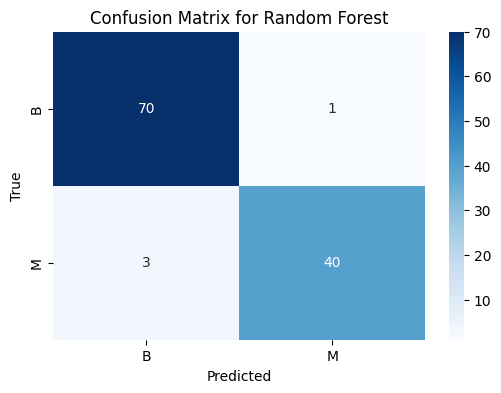

Evaluation for model KNN:
Training set evaluation:
              precision    recall  f1-score   support

           B       0.93      0.98      0.95       286
           M       0.97      0.87      0.92       169

    accuracy                           0.94       455
   macro avg       0.95      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455

Test set evaluation:
              precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix for the test set:
[[71  0]
 [ 5 38]]


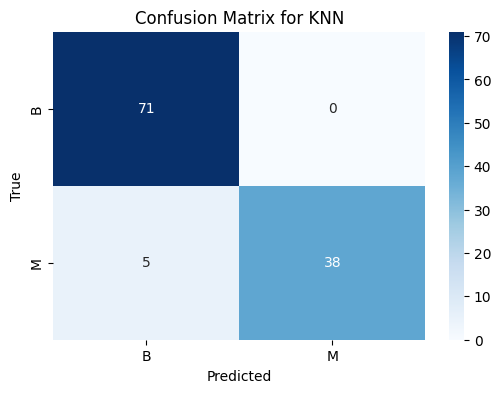

Evaluation for model Naive Bayes:
Training set evaluation:
              precision    recall  f1-score   support

           B       0.93      0.97      0.95       286
           M       0.94      0.88      0.91       169

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455

Test set evaluation:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix for the test set:
[[71  0]
 [ 3 40]]


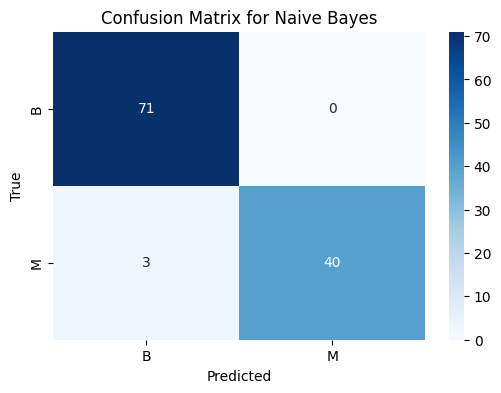

Evaluation for model Decision Tree:
Training set evaluation:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test set evaluation:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix for the test set:
[[68  3]
 [ 3 40]]


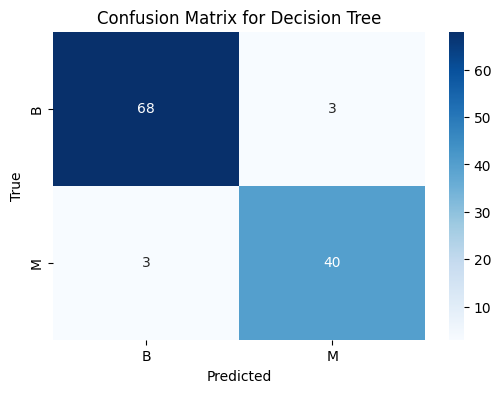

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_without_pca = {
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=5),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models_without_pca.items():
    print(f"Evaluation for model {name}:")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Training set evaluation:")
    print(classification_report(y_train, y_train_pred))
    
    print("Test set evaluation:")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix for the test set
    print("Confusion Matrix for the test set:")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Based on the results above, the model shows indications of overfitting because the model seems to work too well with perfect accuracy. Overfitting can occur because the model memorizes the training data. In this case, the model was trained with 29 columns of data to predict cancer diagnoses. Too many training columns/features result in "model memorization" events. Too many features also result in the model only seeing certain features that are directly related to the target so that the model can make direct predictions without paying attention to other features. To minimize the occurrence of overfitting, it is necessary to use the PCA technique to reduce the dimensions of the data.

# PCA ANALYSIS 


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

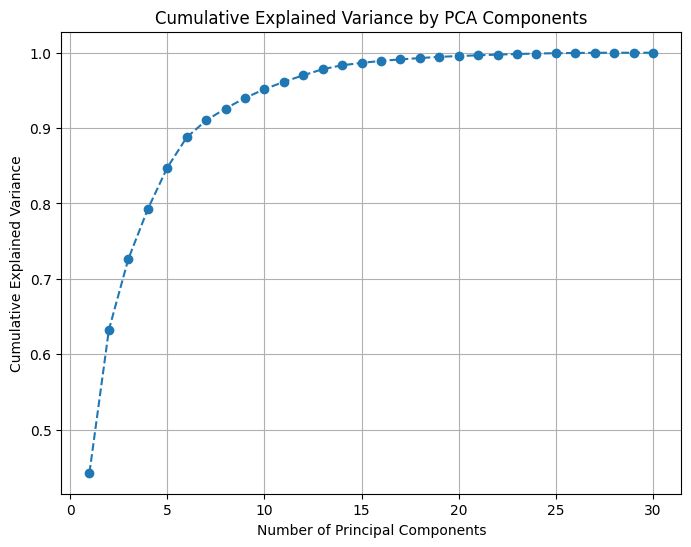

Number of principal components that retain 95% of the variance:: 10


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f'Number of principal components that retain 95% of the variance:: {pca_95.n_components_}')

Before carrying out PCA on the dataset that was compiled in the previous section, you need to know how many variables must be present to maintain 95% of the variance. The reason for maintaining 95% of the variance in the dataset is to suit the purpose of PCA. The goal of PCA is to reduce the dimensionality of the dataset, but still retain as much information (variance) as possible. By maintaining 95% variance, it is ensured that the dataset we have maintains its important information in a simpler and more compact form with minimal loss of information. Based on the results of the following analysis, the number of variables that must be present is 10. Therefore, the next stage is to carry out PCA with the number of components being 10.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca_values_df = pd.DataFrame(
    X_train_pca,
    columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]
)

excel_path = '/kaggle/working/pca_values.xlsx'
pca_values_df.to_excel(excel_path, index=False)

pca_values_df.head(), excel_path

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame(
    {"Principal Component": [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
     "Explained Variance Ratio": explained_variance_ratio}
)

print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_df)

Explained Variance Ratio for Each Principal Component:
  Principal Component  Explained Variance Ratio
0                 PC1                  0.435028
1                 PC2                  0.195000
2                 PC3                  0.097815
3                 PC4                  0.064864
4                 PC5                  0.052534
5                 PC6                  0.041128
6                 PC7                  0.022356
7                 PC8                  0.016480
8                 PC9                  0.013801
9                PC10                  0.012053


The code above is used to:
1. Split the dataset into 80% training set and 20% test set
2. Normalization of values
3. Perform PCA with the number of components is 10 (according to the analysis in the previous section)

In [20]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred


models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

The following code is used to:
1. Create the evaluate_model function to evaluate the model by comparing y_pred as a diagnosis prediction with the y_test value as the actual diagnosis result. To get the y_pred value, enter the X_test data
2. Build machine learning models in the form of Random Forest, KNN, Naive Bayes and Decision Tree with random state parameters for Random Forest and Decision Tree are 42, while the number of neighbors for KNN is
3. Create a plot_confusion_matrix function to see how each True Positive, True Negative, False Positive and False Negative of the model created. This component will affect the calculation of precision, recall and f1 score. 5

Model Accuracy Random Forest with PCA: 94.74%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



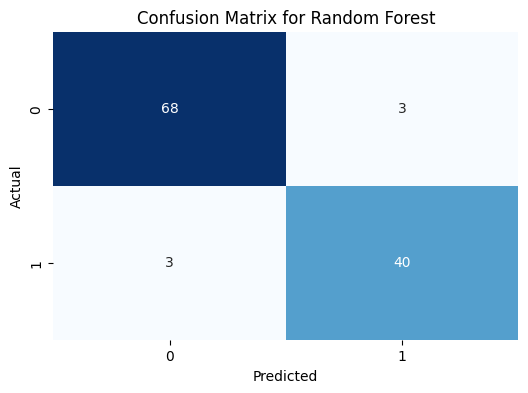

Model Accuracy KNN with PCA: 95.61%
Classification Report for KNN:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



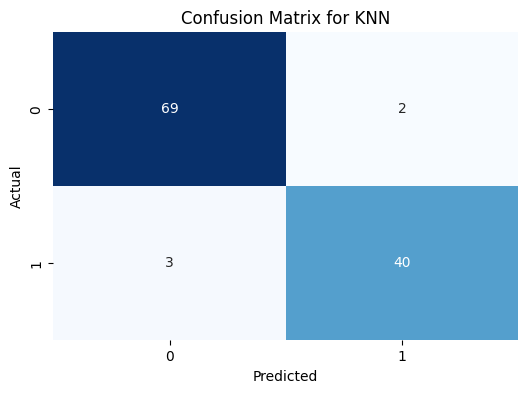

Model Accuracy Naive Bayes with PCA: 92.11%
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           B       0.91      0.97      0.94        71
           M       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



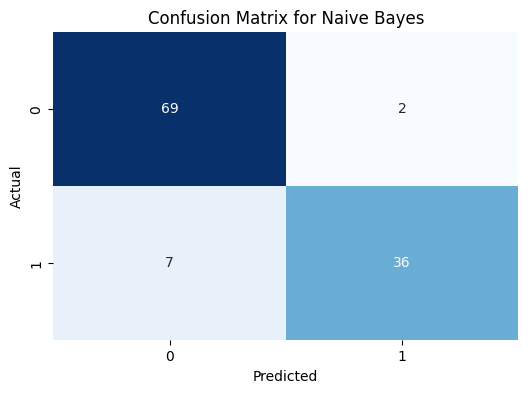

Model Accuracy Decision Tree with PCA: 94.74%
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



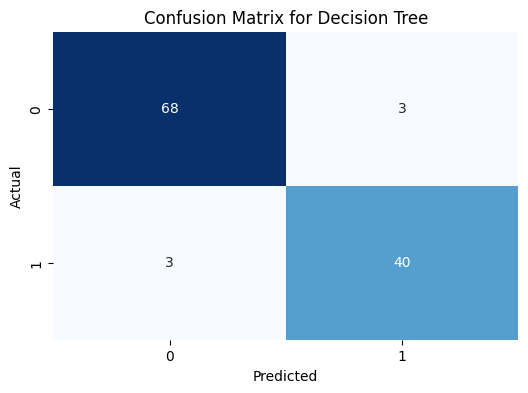

In [21]:
accuracy_results = {}
y_preds = {}


for name, model in models.items():
    accuracy, y_pred = evaluate_model(model, X_train_pca, y_train, X_test_pca, y_test)
    accuracy_results[name] = accuracy
    y_preds[name] = y_pred
    
    print(f"Model Accuracy {name} with PCA: {accuracy * 100:.2f}%")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred, name)


## Theory
1. Model accuracy shows how much the model correctly predicts the class. If the model can predict all test sets correctly, then the model accuracy can be 1.0 or 100%.

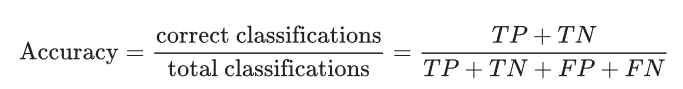

2. Recall (true positive rate) shows the ratio of correct predictions of the positive class to all actual cases of the positive class.

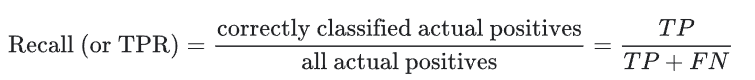

3. Precision shows model accuracy in predicting the positive class.

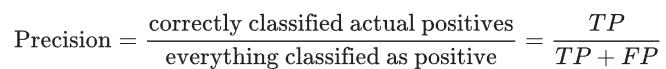

4. Confusion Matrix is ​​a table that shows the performance of the classification model.

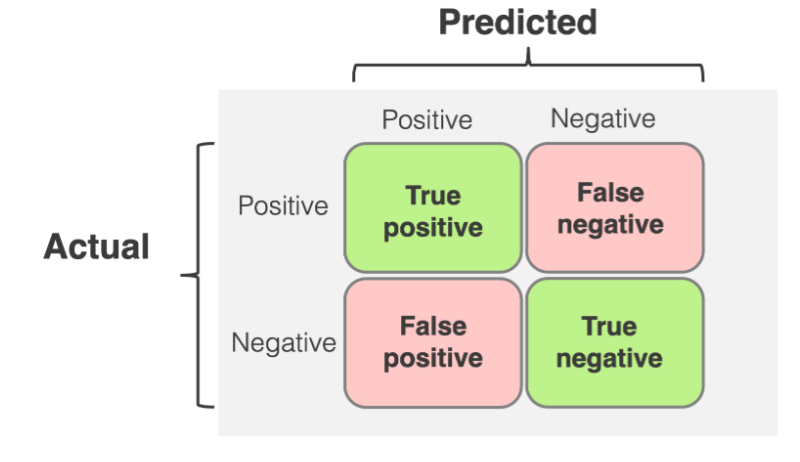



Based on the percentage of accuracy obtained from the four models, it was found that using the k-Nearest Neighbor model had the best accuracy on the PCA dataset with an accuracy value of 95.61%, followed by Random Forest and Decision Tree with an accuracy of 94.74% and Naive Bayes with an accuracy of 92.11%



## Interpretation of the Confusion Matrix
* Random Forest
  
   The model correctly predicted class 0 68 times
  
   The model predicts class 1 correctly 40 times
  
   The model incorrectly predicted class 0 3 times
  
   The model incorrectly predicted class 1 3 times
  
* KNN
  
   The model correctly predicted class 0 69 times
  
   The model predicts class 1 correctly 40 times
  
   The model incorrectly predicted class 0 2 times
  
   The model incorrectly predicted class 1 3 times
  
* Naive Bayes
  
   The model correctly predicted class 0 69 times
  
   The model predicted class 1 correctly 36 times
  
   The model incorrectly predicted class 0 3 times
  
   The model incorrectly predicted class 1 7 times
  
* Decision Trees
  
   The model correctly predicted class 0 68 times
  
   The model predicts class 1 correctly 40 times
  
   The model incorrectly predicted class 0 3 times
  
   The model incorrectly predicted class 1 3 times
  


## Interpretation of Classification Evaluation Matrix
1. Precision: model accuracy in predicting the positive class
   * Random Forest:
     precision for class B (benign) is 0.96, and for class M (malignant) is 0.93. This shows that of all benign predictions, 96% of them are correct, while 93% of malignant predictions are correct.
   * KNN:
     precision for class B (benign) is 0.96, and for class M (malignant) is 0.95. This shows that of all benign predictions, 96% of them are correct, while 95% of malignant predictions are correct.
   * Naive Bayes:
     precision for class B (benign) is 0.91, and for class M (malignant) is 0.95. This shows that of all benign predictions, 91% of them are correct, while 95% of malignant predictions are correct.
   * Decision Tree:
     precision for class B (benign) is 0.96, and for class M (malignant) is 0.93. This shows that of all benign predictions, 96% of them are correct, while 93% of malignant predictions are
     
2. Recall: the ratio of correct predictions of the positive class to all actual cases of the positive class
    * Random Forest:
     recall for class B is 0.96, meaning that of all benign cases, the model can detect 96% of them correctly. The recall for class M was 0.93, which means the model detected 93% of all malignant cases.
   * KNN:
     recall for class B is 0.97, meaning that of all benign cases, the model can detect 97% of them correctly. The recall for class M was 0.93, which means the model detected 93% of all malignant cases.
   * Naive Bayes:
     recall for class B is 0.97, meaning that of all benign cases, the model can detect 97% of them correctly. The recall for class M was 0.84, which means the model detected 84% of all malignant cases.
   * Decision Tree:
     recall for class B is 0.96, meaning that of all benign cases, the model can detect 96% of them correctly. The recall for class M was 0.93, which means the model detected 93% of all malignant
     
3. F1-score: average of precision and recall to show the model's balance between precision and recall
   * Random Forest:
     The F1-score for class B is 0.97, and for class M is 0.94. This shows that for both classes, the model achieves a good balance between precision and recall.
   * KNN:
     The F1-score for class B is 0.96, and for class M is 0.93. This shows that for both classes, the model achieves a good balance between precision and recall.
   * Naive Bayes:
     The F1-score for class B is 0.94, and for class M is 0.89. This shows that for both classes, the model achieves a fairly good balance between precision and recall.
   * Decision Tree:
     The F1-score for class B is 0.96, and for class M is 0.93. This shows that for both classes, the model achieves a good balance between precision and recall.

In [22]:
comparison_df = pd.DataFrame({
    'Index': range(len(y_test)),
    'Actual values': y_test.values,
    'Random Forest Prediction': y_preds['Random Forest'],
    'KNN Prediction': y_preds['KNN'],
    'Naive Bayes Prediction': y_preds['Naive Bayes'],
    'Decision Tree Prediction': y_preds['Decision Tree']
})
print("\n Comparison Actual Values vs Predicted Values:")
print(comparison_df) 


 Comparison Actual Values vs Predicted Values:
     Index Actual values Random Forest Prediction KNN Prediction  \
0        0             B                        B              B   
1        1             M                        M              M   
2        2             M                        M              M   
3        3             B                        B              B   
4        4             B                        B              B   
..     ...           ...                      ...            ...   
109    109             B                        B              B   
110    110             M                        M              M   
111    111             B                        B              B   
112    112             B                        B              B   
113    113             M                        M              M   

    Naive Bayes Prediction Decision Tree Prediction  
0                        B                        B  
1                        M 

It is known that the model can predict well

## What if n_components is changed to 15 to see if the 10 components selected are correct?

Model Accuracy Random Forest with PCA: 95.61%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



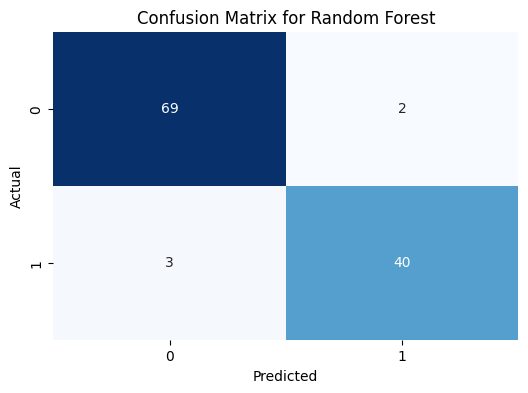

Model Accuracy KNN with PCA: 94.74%
Classification Report for KNN:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



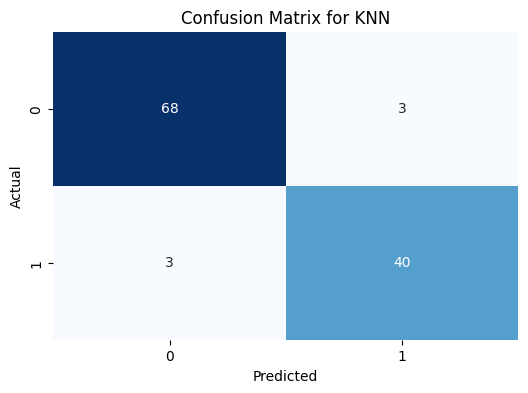

Model Accuracy Naive Bayes with PCA: 92.11%
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           B       0.92      0.96      0.94        71
           M       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



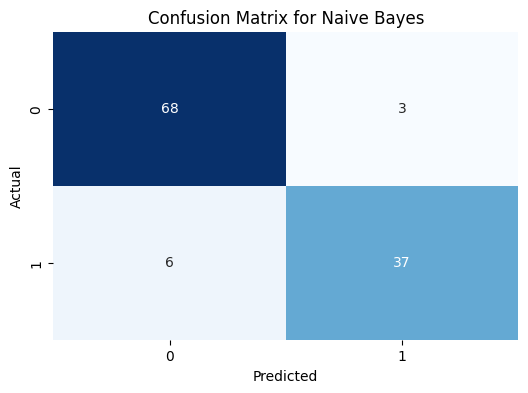

Model Accuracy Decision Tree with PCA: 93.86%
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



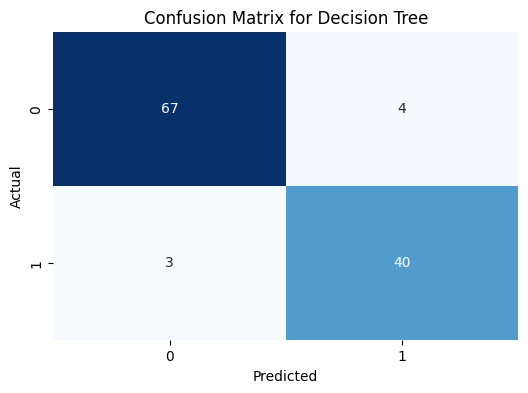

In [23]:
pca15 = PCA(n_components=15) 
X_train_pca15 = pca15.fit_transform(X_train_scaled)
X_test_pca15 = pca15.transform(X_test_scaled)

accuracy_results15 = {}
y_preds15 = {}

for name, model in models.items():
    accuracy, y_pred = evaluate_model(model, X_train_pca15, y_train, X_test_pca15, y_test)
    accuracy_results15[name] = accuracy
    y_preds15[name] = y_pred
    
    print(f"Model Accuracy {name} with PCA: {accuracy * 100:.2f}%")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred, name)


If this is done, the accuracy value is lower compared to using 10 PCA components.

# Conclusion
1. The PCA that has been used maintains 95% of the variance in the dataset to suit the purpose of PCA. The goal of PCA is to reduce the dimensionality of the dataset, but still retain as much information (variance) as possible. By maintaining 95% variance, it is ensured that the dataset we have maintains its important information in a simpler and more compact form with minimal loss of information. 

2. The evaluation metrics of precision, recall, and F1 score show that all models have good abilities in detecting both classes with good result AHowever, the unequal number of classes between benign and malignant in classification cases may be a problem in the future, such as a model bias that predicts better in classes with more data (in this case the benign class). 
3. The Role of Each Model
   - Random Forest uses several decision trees to provide excellent predictions.
   - KNN looks for the K nearest neighbors of a new sample based on distance (usually Euclidean distance) and makes predictions from the majority of neighbor. So, it will perform better when the amount of data for each class is same.
   - Naive Bayes applies Bayes Theorem assuming each feature is independent of each other ("naive" assums) so it less optimal option.
   - Decision Trees divide the dataset based on features that provide maximum information in each branch, but prone to overfitting if not used properly.